##### 题目二：采用 scikit-learn 中的 LogisticRegression 逻辑回归模型对 iris 数据集进行多分类


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

plt.rcParams['font.family'] = 'SimHei'      # 中文正常显示
plt.rcParams['axes.unicode_minus'] = False  # 符号正常显示
# 题目一中只选择了两个类别，这里我们选择全部三个类别，但是仍然只选择两个特征，即花萼长度和花萼宽度
iris = load_iris()
X = iris.data[:, :2]  # 使用前两个特征
y = iris.target
class_names = iris.target_names # 这里选择全部三类
# 划分训练集和测试集,stratify参数，可以直接按照原始数据集的类别比例来划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555,stratify=y)

1. 模型建立：任选两个特征和全部类别进行散点图可视化，并建立多分类模型

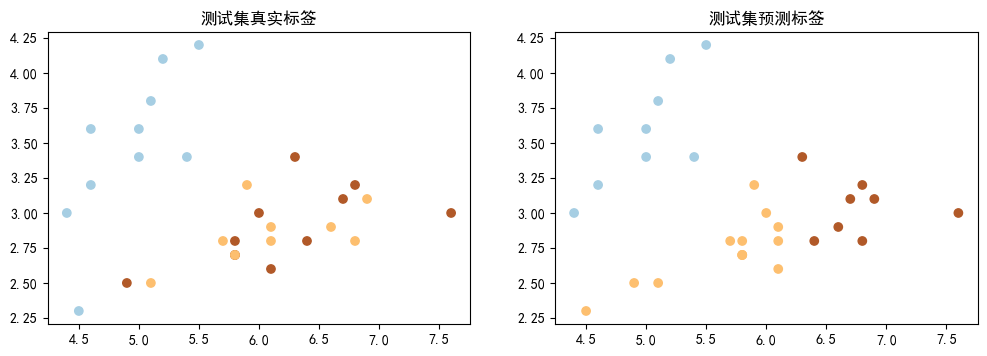

In [2]:
from sklearn.linear_model import LogisticRegression 
# 指定 penalty='none'，即不使用正则化项，
# multi_class='multinomial'，即使用 softmax（交叉熵损失函数）
clf = LogisticRegression(random_state=5,penalty=None,multi_class='multinomial').fit(X_train, y_train)
result = clf.predict(X_test)
plt.figure(figsize=(12, 3.8))
plt.subplot(121)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)# 绘制测试集散点图
plt.title('测试集真实标签')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=result, cmap=plt.cm.Paired)# 绘制测试集散点图
plt.title('测试集预测标签')
plt.show()

2. 输出：决策函数的参数、预测值、分类准确率等

In [3]:
import sklearn.metrics
# 输出：决策函数的参数、预测值、分类准确率等
test_predict = clf.predict(X_test)
train_predict = clf.predict(X_train)
coef = clf.coef_
intercept = clf.intercept_
print("训练集准确率：", sklearn.metrics.accuracy_score(y_train, train_predict))
print("测试集准确率：", sklearn.metrics.accuracy_score(y_test, test_predict))
print("权重：", coef)
print("截距：", intercept)
print("函数为：y = {:.2f}x1 + {:.2f}x2 + {:.2f}，其中x1为花萼长度，x2为花萼宽度".format(coef[0][0], coef[0][1], intercept[0]))


训练集准确率： 0.85
测试集准确率： 0.7
权重： [[-27.78795913  46.07411192]
 [ 12.57346116 -23.1423225 ]
 [ 15.21449796 -22.93178942]]
截距： [  6.15351509   5.49702222 -11.65053731]
函数为：y = -27.79x1 + 46.07x2 + 6.15，其中x1为花萼长度，x2为花萼宽度


3. 决策边界可视化：将多分类问题的边界可视化

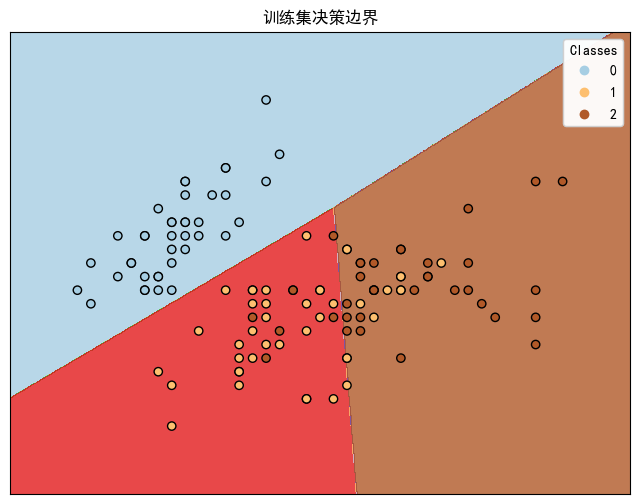

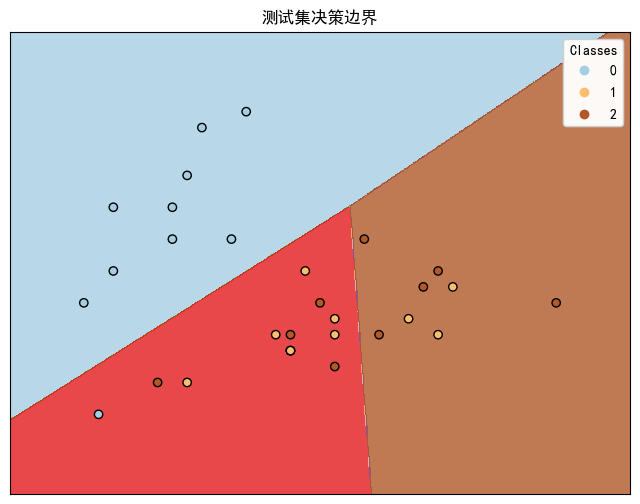

In [4]:
# 定义函数来绘制决策边界
def plot_decision_boundary(X, y, model, ax, steps=1000, cmap='Paired',title='决策边界'):
    """
    绘制决策边界, X 为数据集，y 为标签，model 为训练好的模型，ax 为绘制的坐标轴，steps 为网格的步长，cmap 为颜色
    """
    cmap = plt.get_cmap(cmap)
    
    # 定义坐标轴范围,并创建网格
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps),
                         np.linspace(y_min, y_max, steps))

    # 计算 Z，即每个网格点的预测值
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制等高线和训练集散点图
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k')
    
    # 图例
    legend1 = ax.legend(*scatter.legend_elements(),
                        title="Classes")
    ax.add_artist(legend1)
    
    ax.set_xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
    ax.set_ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


# 绘制训练集决策边界
fig, ax = plt.subplots(figsize=(8,6))
plot_decision_boundary(X_train, y_train, clf, ax,title='训练集决策边界')

# 绘制测试集决策边界
fig, ax = plt.subplots(figsize=(8,6))
plot_decision_boundary(X_test, y_test, clf, ax,title='测试集决策边界')

plt.show()



- 讨论一：不同多分类策略的效果如何？有何差异？

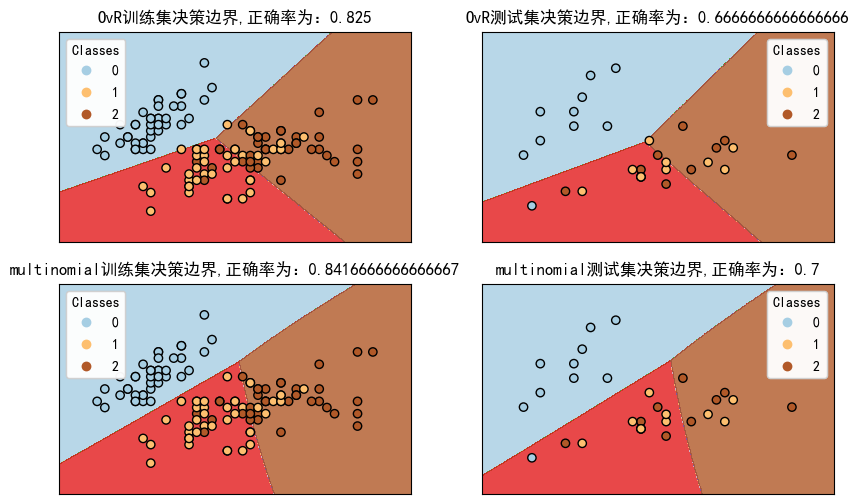

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

# 对比 LogisticRegression 中的 multi_class =’ovr’或’multinomial’两种多分类的差异
# 创建两个pipeline
ovr_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # 数据标准化
    ('clf', LogisticRegression(random_state=5, multi_class='ovr'))   # 使用ovr策略
])
multinomial_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=5)),  # 设置degree参数为所需的多项式阶数
    ('scaler', StandardScaler()),   # 数据标准化
    ('clf', LogisticRegression(random_state=5, multi_class='multinomial'))   # 使用multinomial策略
])
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10, 6)
# 训练模型
ovr_pipeline.fit(X_train, y_train)
# 预测
y_pred = ovr_pipeline.predict(X_train)
# 计算准确率,使用accuracy_score函数
ovr_accuracy = accuracy_score(y_train, y_pred)
# 绘制训练集决策边界
plot_decision_boundary(X_train, y_train, ovr_pipeline, ax[0][0],title='OvR训练集决策边界,正确率为：'+str(ovr_accuracy))
# 预测
y_pred = ovr_pipeline.predict(X_test)
# 计算准确率,使用accuracy_score函数
ovr_accuracy = accuracy_score(y_test, y_pred)
# print("使用ovr策略的准确率为：", ovr_accuracy)
# 绘制测试集决策边界
plot_decision_boundary(X_test, y_test, ovr_pipeline, ax[0][1],title='OvR测试集决策边界,正确率为：'+str(ovr_accuracy))

# 训练模型
multinomial_pipeline.fit(X_train, y_train)
# 预测
y_pred = multinomial_pipeline.predict(X_train)
# 计算准确率,使用accuracy_score函数
multinomial_accuracy = accuracy_score(y_train, y_pred)
# 绘制训练集决策边界
plot_decision_boundary(X_train, y_train, multinomial_pipeline, ax[1][0],title='multinomial训练集决策边界,正确率为：'+str(multinomial_accuracy))
# 预测
y_pred = multinomial_pipeline.predict(X_test)
# 计算准确率,使用accuracy_score函数
multinomial_accuracy = accuracy_score(y_test, y_pred)
# print("使用multinomial策略的准确率为：", multinomial_accuracy)
# 绘制测试集决策边界
plot_decision_boundary(X_test, y_test, multinomial_pipeline, ax[1][1],title='multinomial测试集决策边界,正确率为：'+str(multinomial_accuracy))

# 观察ovr一对多策略和multinomial多项式逻辑回归策略的决策边界
# 对于本次数据集，ovr的效果较好，每次只需要区分出某一类，训练三个分类器即可。由于数据集较小且结果较接近，暂时不能得出准确且普适的结论


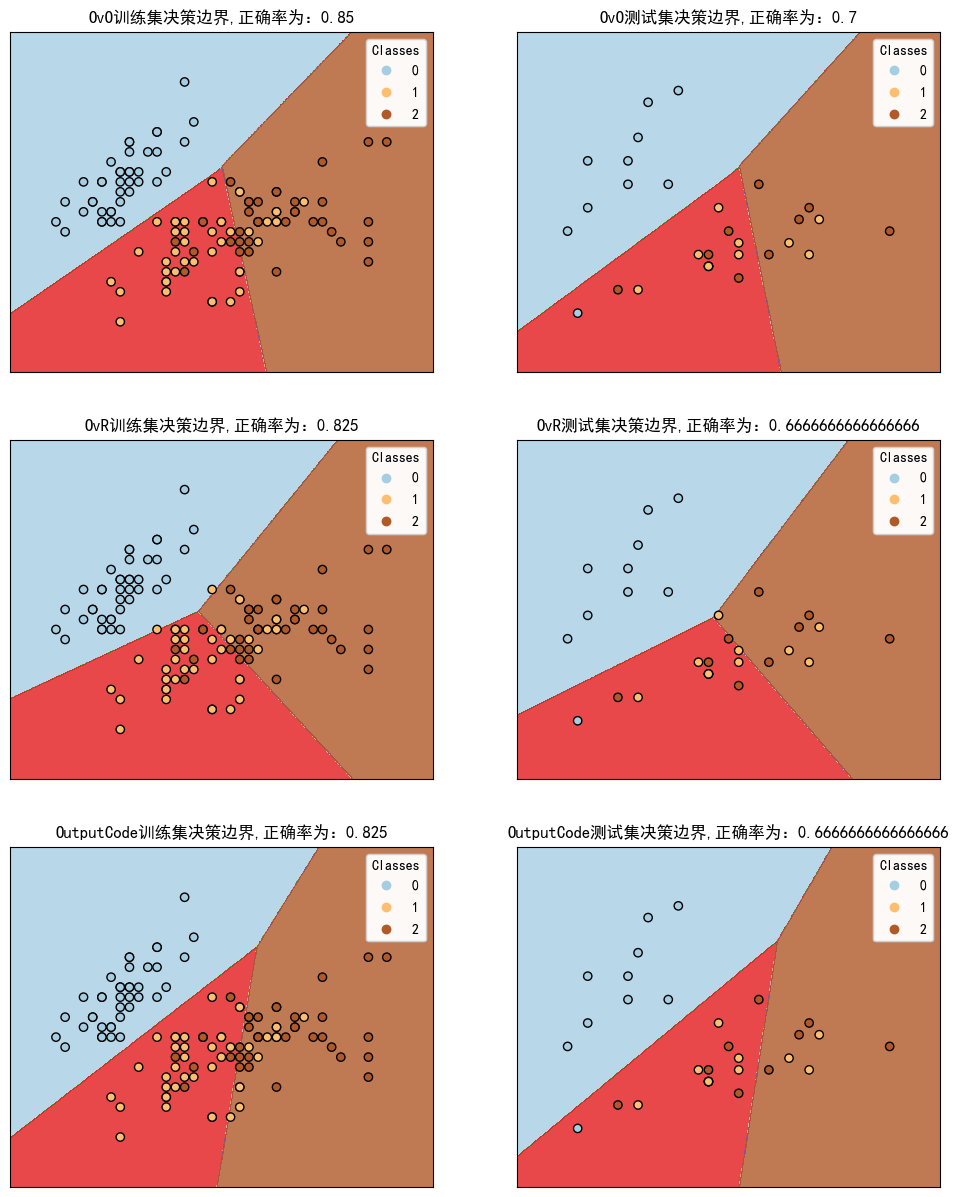

<Figure size 640x480 with 0 Axes>

In [6]:
# 使用 Multiclass classification 中提供的 3 种多分类策略，并对比效果
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
# 创建三个pipeline
# 使用OvO策略
ovo_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # 数据标准化
    ('clf', OneVsOneClassifier(LogisticRegression(random_state=5)))   # 使用OvO策略
])
# 使用OvR策略
ovr_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # 数据标准化
    ('clf', OneVsRestClassifier(LogisticRegression(random_state=5)))   # 使用OvR策略
])
# 使用 error-correcting output codes 策略
outputcode_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # 数据标准化
    # 使用OutputCode策略,即使设置了random_state，每次运行结果也不一样，这是因为OutputCodeClassifier中使用了随机数
    ('clf', OutputCodeClassifier(LogisticRegression(random_state=15)))   
])
# 创建画布
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(12, 15)
# 训练模型
ovo_pipeline.fit(X_train, y_train)
# 预测
y_pred = ovo_pipeline.predict(X_train)
ovo_accuracy = accuracy_score(y_train, y_pred)
# print("使用OvO策略的训练集准确率为：", ovo_accuracy)
# 绘制训练集决策边界
plot_decision_boundary(X_train, y_train, ovo_pipeline, ax[0][0],title='OvO训练集决策边界,正确率为：'+str(ovo_accuracy))
# 预测
y_pred = ovo_pipeline.predict(X_test)
# 计算准确率,使用accuracy_score函数
ovo_accuracy = accuracy_score(y_test, y_pred)
# print("使用OvO策略的测试集准确率为：", ovo_accuracy)
# 绘制测试集决策边界
plot_decision_boundary(X_test, y_test, ovo_pipeline, ax[0][1],title='OvO测试集决策边界,正确率为：'+str(ovo_accuracy))


# 训练模型
ovr_pipeline.fit(X_train, y_train)
# 预测
y_pred = ovr_pipeline.predict(X_train)
ovr_accuracy = accuracy_score(y_train, y_pred)
# print("使用OvR策略的训练集准确率为：", ovr_accuracy)
# 绘制训练集决策边界
plot_decision_boundary(X_train, y_train, ovr_pipeline, ax[1][0],title='OvR训练集决策边界,正确率为：'+str(ovr_accuracy))
# 预测
y_pred = ovr_pipeline.predict(X_test)
# 计算准确率,使用accuracy_score函数
ovr_accuracy = accuracy_score(y_test, y_pred)
# print("使用OvR策略的测试集准确率为：", ovr_accuracy)
# 绘制测试集决策边界
plot_decision_boundary(X_test, y_test, ovr_pipeline, ax[1][1],title='OvR测试集决策边界,正确率为：'+str(ovr_accuracy))

# 训练模型
outputcode_pipeline.fit(X_train, y_train)
# 预测
y_pred = outputcode_pipeline.predict(X_train)
outputcode_accuracy = accuracy_score(y_train, y_pred)
# print("使用OutputCode策略的训练集准确率为：", outputcode_accuracy)
# 绘制训练集决策边界
plot_decision_boundary(X_train, y_train, outputcode_pipeline, ax[2][0],title='OutputCode训练集决策边界,正确率为：'+str(outputcode_accuracy))
# 预测
y_pred = outputcode_pipeline.predict(X_test)
# 计算准确率,使用accuracy_score函数
outputcode_accuracy = accuracy_score(y_test, y_pred)
# print("使用OutputCode策略的测试集准确率为：", outputcode_accuracy)
# 绘制测试集决策边界
plot_decision_boundary(X_test, y_test, outputcode_pipeline, ax[2][1],title='OutputCode测试集决策边界,正确率为：'+str(outputcode_accuracy))

plt.show()

# fig, ax = plt.subplots(1, 3)
# fig.set_size_inches(10, 4)
# 绘制OvO策略的混淆矩阵
# y_pred = ovo_pipeline.predict(X_test)
# cm_ovo = confusion_matrix(y_test, y_pred)
# im_ovo = ax[0].imshow(cm_ovo, interpolation='nearest', cmap=plt.cm.Blues)
# ax[0].set_title('OvO混淆矩阵')
# fig.colorbar(im_ovo, ax=ax[0], shrink=0.6)

# # 绘制OvR策略的混淆矩阵
# y_pred = ovr_pipeline.predict(X_test)
# cm_ovr = confusion_matrix(y_test, y_pred)
# im_ovr = ax[1].imshow(cm_ovr, interpolation='nearest', cmap=plt.cm.Blues)
# ax[1].set_title('OvR混淆矩阵')
# fig.colorbar(im_ovr, ax=ax[1], shrink=0.6)

# 绘制OutputCode策略的混淆矩阵
# y_pred = outputcode_pipeline.predict(X_test)
# cm_outputcode = confusion_matrix(y_test, y_pred)
# im_outputcode = ax[2].imshow(cm_outputcode, interpolation='nearest', cmap=plt.cm.Blues)
# ax[2].set_title('OutputCode混淆矩阵')
# fig.colorbar(im_outputcode, ax=ax[2], shrink=0.6)

plt.tight_layout()
plt.show()

# 对比发现OVO的精度最高，因为其原理是训练n(n-1)/2个分类器，分类结果更好。
# 在多次尝试后发现，ECOC的结果并不稳定